# Markov Chain Monte Carlo 

In [3]:
library(ggplot2)

#![alternatvie text](mcmc.png)

In [4]:
mcmc <- function(px, Mgx, x0){

    # where px = true distribution
    # Mgx = distribution to be sampled from, greater than px
    # x0 is a starting value 


    # empty vector necessary for the for loop
    accepted <- c()


    # For loop, introducing the computation of the acceptance-rejection method for the monte carlo markov chain 

        for(i in 1:10^5){
            
            x1 <- Mgx(x0)# proposed starting point applied to prior 
            AR_ratio <- ifelse((px(x1)/px(x0)) > 1, 1,px(x1)/px(x0)) # calculating the ratio 
            # the above ratio is representative of the probability of accepting a sample

            # if the ratio is greater than a random uniform sample, set the value as x1 (prior applied to starting value) -
            accepted[i] <- ifelse(runif(1) < AR_ratio, x1, x0)
    
            # The markov chain: learn from previously accepted sample: 
            x0 <- accepted[i] # the above value, if accepted, then becomes the new starting value 

        }



# plotting the above 
# plotting to show the learning of the mu parameter 
dat <- data.frame(accepted)
plot1 <- ggplot(dat) + 
geom_line(aes(x = c(1:10^5), y = accepted)) + 
theme_bw(base_size = 20) +
labs(x = "Index", y =  "Samples")


# plotting the posterior distribution 
dat2 <- data.frame(cbind(dat, px(c(1:10^5))))
colnames(dat2) <- c('Posterior', 'True')
plot2 <- ggplot(dat2) +
geom_density(aes(x = Posterior))+
theme_bw(base_size = 20) 



list(plot1, plot2)

}
 







[[1]]

[[2]]


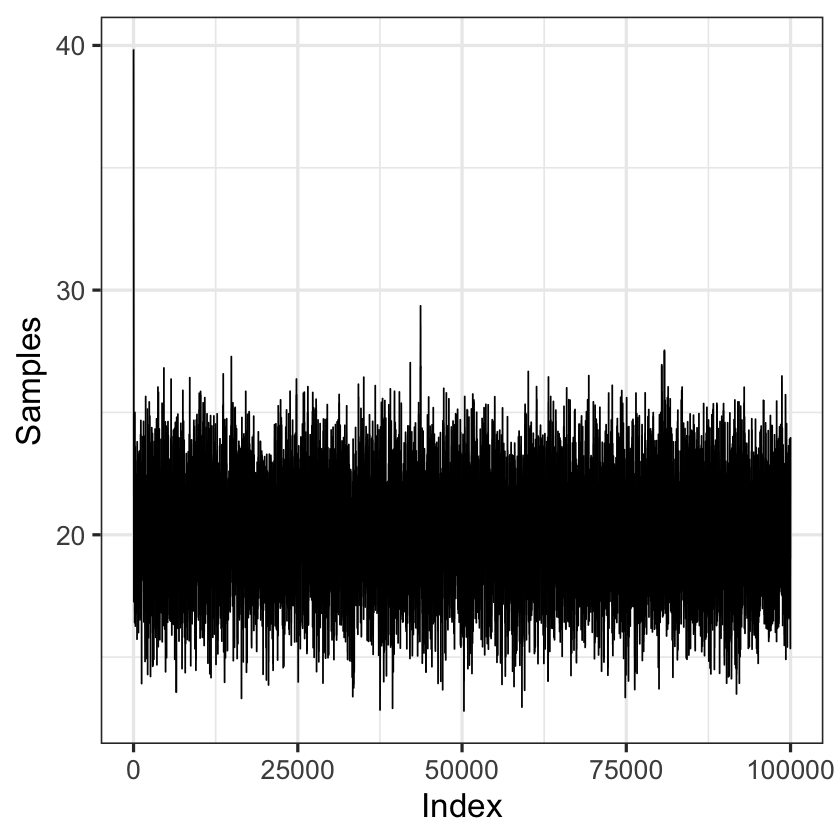

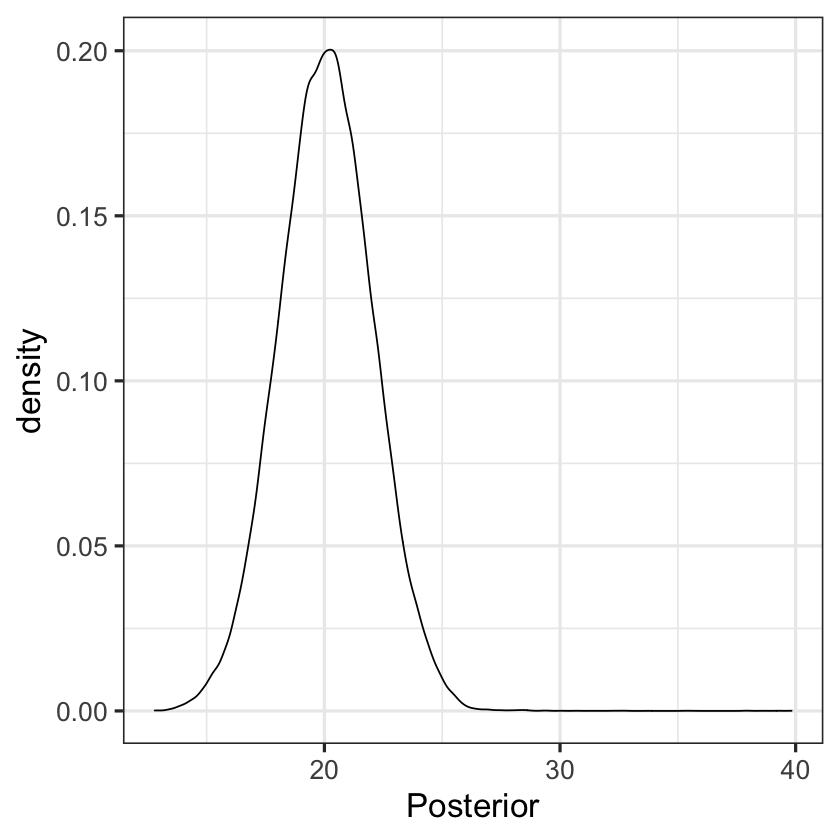

In [5]:
target_dist <- function(x){
    (1/sqrt(2*pi*2^2))*exp((-(x-20)^2)/(2*2^2))
}

proposed_dist <- function(x){
    rnorm(1, mean = x, sd = 1)
}




mcmc(target_dist, proposed_dist, 40)
